In [38]:
# Import the data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [39]:
import utilities
import importlib
importlib.reload(utilities)

<module 'utilities' from 'c:\\Users\\risab\\Desktop\\Project2_Bank_Customer_Churn\\utilities.py'>

In [40]:
df = pd.read_csv('Resources/Customer-Churn-Records.csv')

In [41]:
knn_model = KNeighborsClassifier(n_neighbors=5)


In [42]:
scores = utilities.processData(df, knn_model)

Accuracy Score: 0.8275
Balanced accuracy Score: 0.6369976454791458
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      1607
           1       0.62      0.32      0.42       393

    accuracy                           0.83      2000
   macro avg       0.73      0.64      0.66      2000
weighted avg       0.81      0.83      0.81      2000



In [43]:
print(scores)

{'accuracy_score': 0.8275, 'balanced_accuracy_score': 0.6369976454791458, 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.85      0.95      0.90      1607\n           1       0.62      0.32      0.42       393\n\n    accuracy                           0.83      2000\n   macro avg       0.73      0.64      0.66      2000\nweighted avg       0.81      0.83      0.81      2000\n'}


In [44]:
# Create a a list to store accuracy values
balanced_accuracy = []
accuracy = []

# Create a a list to store the values of k
k = list(range(1, 20))


for i in k:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    scores = utilities.processData(df, knn_model)
    balanced_accuracy.append(scores['balanced_accuracy_score'])
    accuracy.append(scores['accuracy_score'])
   

Accuracy Score: 0.793
Balanced accuracy Score: 0.6539741050208139
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      1607
           1       0.47      0.42      0.45       393

    accuracy                           0.79      2000
   macro avg       0.67      0.65      0.66      2000
weighted avg       0.79      0.79      0.79      2000

Accuracy Score: 0.824
Balanced accuracy Score: 0.6050247723461764
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      1607
           1       0.64      0.24      0.35       393

    accuracy                           0.82      2000
   macro avg       0.74      0.61      0.63      2000
weighted avg       0.80      0.82      0.79      2000

Accuracy Score: 0.8195
Balanced accuracy Score: 0.6483585648664953
Classification Report:
               precision    recall  f1-score   support

           0       0

In [45]:
# Create a dictionary that holds the list values for k and inertia
elbow_data = {"k": k, "accuracy": accuracy, "balanced accuracy": balanced_accuracy}

# Create a DataFrame using the elbow_data dictionary
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,accuracy,balanced accuracy
0,1,0.7930,0.653974
1,2,0.8240,0.605025
2,3,0.8195,0.648359
3,4,0.8340,0.617975
4,5,0.8275,0.636998


<Axes: xlabel='k'>

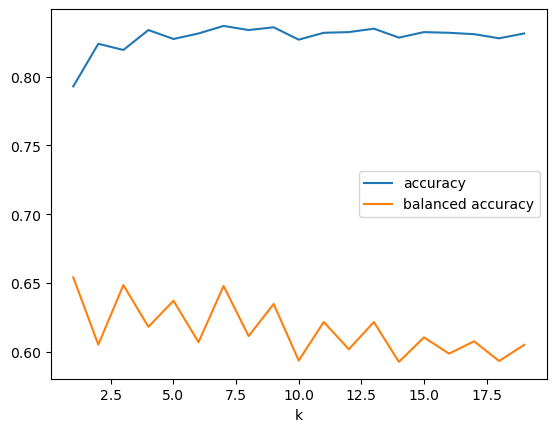

In [46]:
# Plot the elbow curve
df_elbow.set_index("k", inplace=True)
df_elbow.plot.line()